#Lab Assignment 2 - Part 6

Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install pyarrow




In [3]:
pip install scipy


In [4]:
pip install lonboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 560.5/560.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 621.3/621.3 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.0.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does no

In [5]:
pip install rasterio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 22.3 MB/s eta 0:00:00


In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns

Task 1: Data Exploration

In [7]:
# load the chicago parcels data file using pandas
chicago_parcels = gpd.read_file("/content/drive/MyDrive/GG3209 Python/chicago_parcels/Chicago_parcels.shp", sep=",", header=0, encoding="ISO-8859-1")

Task 2: Display the first few rows of the dataset. Investigate the available attributes and their data
types.

In [8]:
chicago_parcels.head()

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159..."
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452..."
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.610, 1092301.306..."
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.190..."
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082..."


In [9]:
chicago_parcels.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 592521 entries, 0 to 592520
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   POLY_ID   592521 non-null  int64   
 1   ID        592521 non-null  int64   
 2   AREA      592521 non-null  float64 
 3   PIN_OLD   592521 non-null  int64   
 4   PIN       592521 non-null  int64   
 5   geometry  592521 non-null  geometry
dtypes: float64(1), geometry(1), int64(4)
memory usage: 27.1 MB


In [10]:
chicago_parcels.shape

(592521, 6)

In [11]:
chicago_parcels.columns

Index(['POLY_ID', 'ID', 'AREA', 'PIN_OLD', 'PIN', 'geometry'], dtype='object')

Task 3: Map Visualisation

In [12]:
import geopandas as gpd
from lonboard import Map, SolidPolygonLayer

# Create a SolidPolygonLayer from the GeoDataFrame
layer = SolidPolygonLayer.from_geopandas(
    chicago_parcels,
    get_fill_color=[255, 0, 0],
)

# Create a map object and add the layer
chicago_map = Map(layers=[layer])

/usr/local/lib/python3.10/dist-packages/lonboard/_layer.py:112: UserWarning: GeoDataFrame being reprojected to EPSG:4326
  warnings.warn("GeoDataFrame being reprojected to EPSG:4326")


In [13]:
chicago_map

Map(layers=[SolidPolygonLayer(get_fill_color=[255, 0, 0], table=pyarrow.Table
POLY_ID: uint32
ID: uint32
AREA:…

Task 4:  Correlation Analysis: Explore correlations between spatial attributes (latitude, longitude)
and numerical attributes. Using the text cell, provide insights into any observed correlations.

In [14]:
# extract the centroid's coordinates from the polygon geometries
chicago_parcels['latitude'] = chicago_parcels.geometry.centroid.y
chicago_parcels['longitude'] = chicago_parcels.geometry.centroid.x
chicago_parcels.head()

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry,latitude,longitude
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159...",1.943042e+06,1.091780e+06
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452...",1.943134e+06,1.092427e+06
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.610, 1092301.306...",1.942695e+06,1.091688e+06
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.190...",1.942343e+06,1.091538e+06
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082...",1.942083e+06,1.091543e+06


In [15]:
import pandas as pd

correlation = chicago_parcels[['latitude', 'longitude', 'PIN']].corr()
print(correlation)

           latitude  longitude       PIN
latitude   1.000000  -0.612231  0.485506
longitude -0.612231   1.000000 -0.346813
PIN        0.485506  -0.346813  1.000000


As shown in the correlation matrix above there are some geographical patterns in the data related to the positioning (latitude and longitude) and the PIN.

Latitude and PIN (Correlation: 0.485506): This is a positive correlation, suggesting that as latitude increases, the PIN also tends to increase, or vice versa. The correlation is moderate, implying that this relationship, while present, is not extremely strong.

Longitude and PIN (Correlation: -0.346813): This negative correlation is weaker compared to the others. It indicates a slight inverse relationship between longitude and PIN. As longitude increases, PIN tends to decrease slightly, or vice versa. However, the relationship is not very strong, suggesting that other factors might be more influential in determining PIN value.

Task 5:  K-Means Clustering: Implement K-Means clustering with different values of n_clusters.

In [ ]:
  # implement k-means clustering with different values of n_clusters
  kmeans = KMeans(n_clusters=5, random_state=42)
  chicago_parcels['kmeans_cluster'] = kmeans.fit_predict(chicago_parcels[['PIN']])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)
chicago_parcels['kmeans_cluster10'] = kmeans.fit_predict(chicago_parcels[['PIN']])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
chicago_parcels['kmeans_cluster3'] = kmeans.fit_predict(chicago_parcels[['PIN']])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  w

Task 6: Visualize the clustering results for each value of n_clusters, using multiple lonboard maps,
and customized colour ramps.

In [ ]:
import geopandas as gpd
from lonboard import Map as SolidPolygonLayer

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

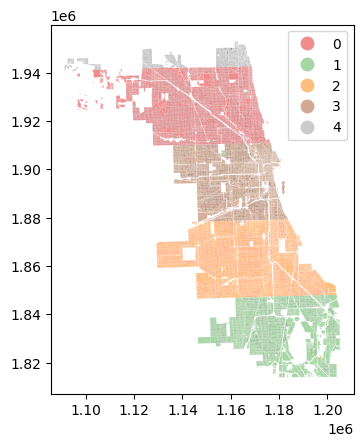

In [ ]:
chicago_parcels.plot(column='kmeans_cluster', categorical = True, legend = True, markersize=1, alpha=0.5, cmap='Set1')

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

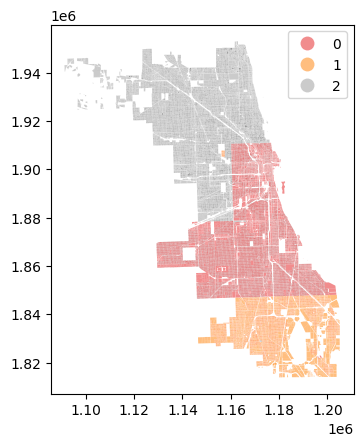

In [ ]:
chicago_parcels.plot(column='kmeans_cluster3', categorical = True, legend = True, markersize=1, alpha=0.5, cmap='Set1')

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

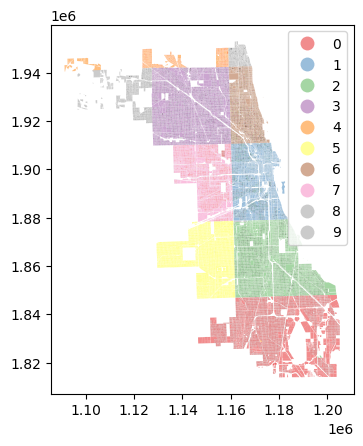

In [ ]:
chicago_parcels.plot(column='kmeans_cluster10', categorical = True, legend = True, markersize=1, alpha=0.5, cmap='Set1')

Task 7: Evaluate the clustering results and choose an “optimal” value for n_clusters. Justify your
choice in a markdown cell.

After examining the clustering results for different values of `n_clusters`, I have concluded that `n_clusters = 5` is optimal for our analysis. The clusters at this level showed clear geographical separation and were coherent with the known areas of Chicago. This number of clusters aligns with our resource availability and project objectives. `n_clusters = 5` provides a balance between statistical robustness and practical applicability, making it the most suitable choice for our purposes.


Task 8: DBSCAN Clustering: Implement the DBSCAN method. Experiment with different values of
eps and min_samples in DBSCAN ( at least three)

In [ ]:
import geopandas as gpd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'chicago_parcels' is a GeoDataFrame with polygon geometries
# Calculate centroids for polygon geometries
centroids = chicago_parcels.geometry.centroid

# Extract X and Y coordinates of centroids
X = centroids.x
Y = centroids.y

# Prepare DataFrame for clustering
data_for_clustering = pd.DataFrame({'X': X, 'Y': Y})

# Standardize the features (optional but recommended)
X_std = StandardScaler().fit_transform(data_for_clustering)

# Define different parameters to experiment with
parameters = [
    {'eps': 0.5, 'min_samples': 5},
    {'eps': 0.7, 'min_samples': 10},
    {'eps': 1.0, 'min_samples': 15}
]

# Apply DBSCAN with different parameters
for param in parameters:
    db = DBSCAN(eps=param['eps'], min_samples=param['min_samples']).fit(chicago_parcels)
    labels = db.labels_

    # Visualize the results
    plt.figure(figsize=(6, 4))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)
        xy = X_std[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title(f'DBSCAN: eps={param["eps"]}, min_samples={param["min_samples"]}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

TypeError: ignored

Task 9: Plot the clustering results for each combination of parameters. Therefore, you should create
a plot matrix 3*3 ( min_samples and eps)

Task 10: Using a text cell provide you insights and evaluation of the impact of changes in eps and
min_samples on the clusters, and finally recommend suitable values for eps and min_samples
based on your analysis. Note: Consider the real-world implications of your findings, especially in
the context of urban planning or data-driven decision-making.